# A feature matching example using the MFD algorithm
Cross-spectral/multispectral feature descriptor algorithms.  
Notebook used for testing and experiments.  
Author: Cristiano Nunes <cfgnunes@gmail.com>.  

---

In [1]:
import cv2
import pandas as pd
from matplotlib import pyplot as plt

from src.feature_matching import FeatureMatching
from src.ehd import EHD
from src.eoh import EOH
from src.mfd import MFD

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'jpeg'

---
## Define the detector and descriptor algorithms

In [3]:
result_precision = pd.DataFrame()
result_matches = pd.DataFrame()


def add_descriptor_algoritm(desc, name):
    descriptor_algorithms.append((desc, name))
    result_precision[name] = 0
    result_matches[name] = 0


# Define the detector algorithm
detector_algorithm = cv2.FastFeatureDetector_create(
    threshold=40,
    nonmaxSuppression=True)

descriptor_algorithms = []

desc = cv2.SIFT_create(
    nfeatures=500,
    nOctaveLayers=3,
    contrastThreshold=0.04,
    edgeThreshold=10.0,
    sigma=1.6)
add_descriptor_algoritm(desc, 'SIFT')

desc = EHD()
add_descriptor_algoritm(desc, 'EHD')

desc = EOH()
add_descriptor_algoritm(desc, 'EOH')

desc = MFD()
add_descriptor_algoritm(desc, 'MFD')


## Sample of results

In [4]:
def run_batch(image_a_filename, image_b_filename):
    # Run all algorithms
    result_precision_it = []
    result_matches_it = []
    for descriptor_algorithm, descriptor_name in descriptor_algorithms:
        fm = FeatureMatching(detector_algorithm, descriptor_algorithm)
        image_matches, matches, precision = fm.match_features(image_a_filename, image_b_filename)
        title = "Algorithm %s (Best matches: %i, Precision: %.2f)" % \
            (descriptor_name, matches, precision)

        # Resize image to produce a small notebook file
        dim = (int(image_matches.shape[1] * 0.4), int(image_matches.shape[0] * 0.4))
        image_matches_small = cv2.resize(image_matches, dim, interpolation = cv2.INTER_AREA)

        # Plot the results
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.axis('off')
        ax.set_title(title)
        ax.imshow(image_matches_small)
        plt.show()

        result_precision_it.append(precision)
        result_matches_it.append(matches)

    result_precision.loc[len(result_precision) + 1] = result_precision_it
    result_matches.loc[len(result_matches) + 1] = result_matches_it

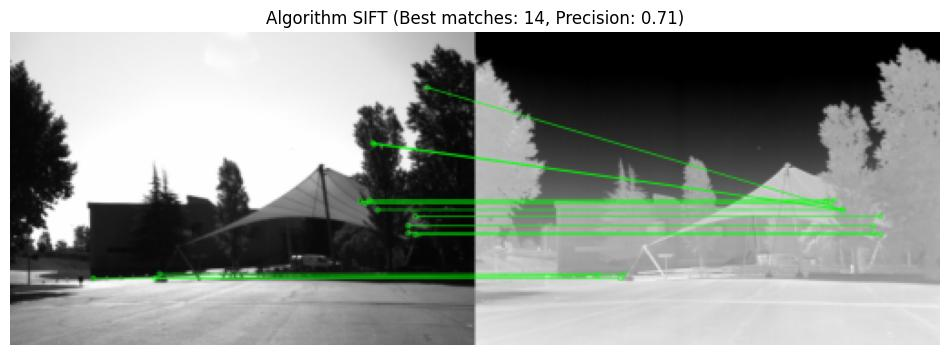

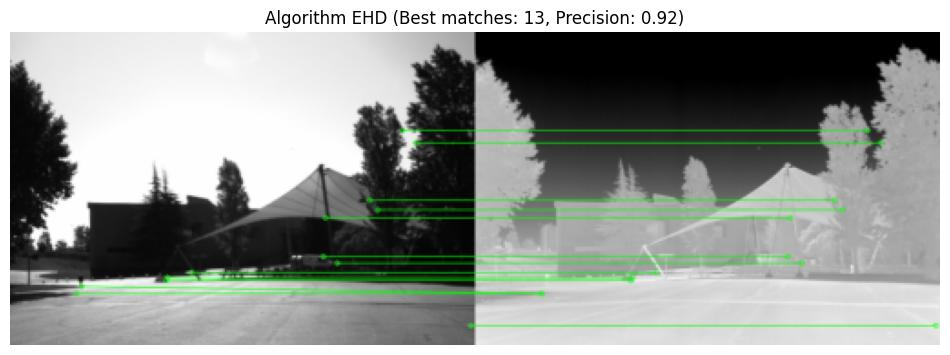

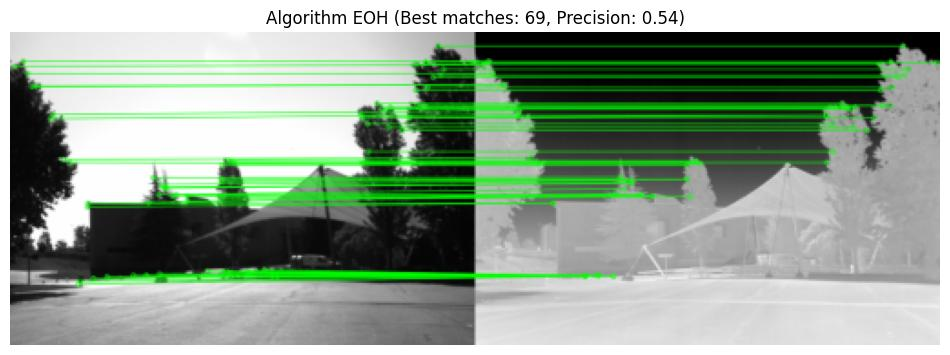

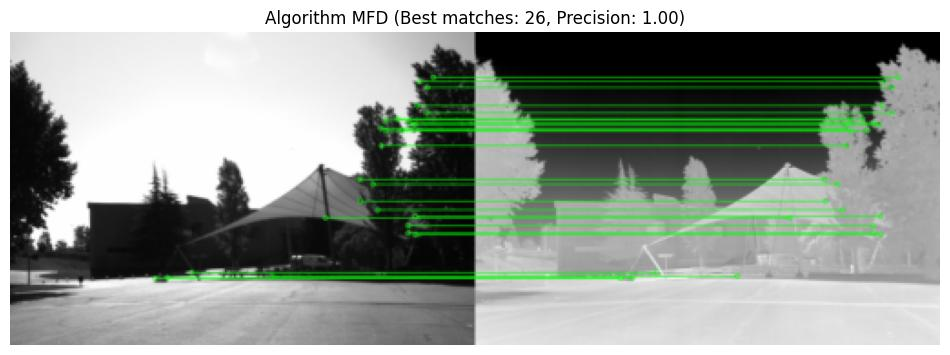

In [5]:
run_batch("images-sample/rgb37.bmp", "images-sample/lwir37.png")

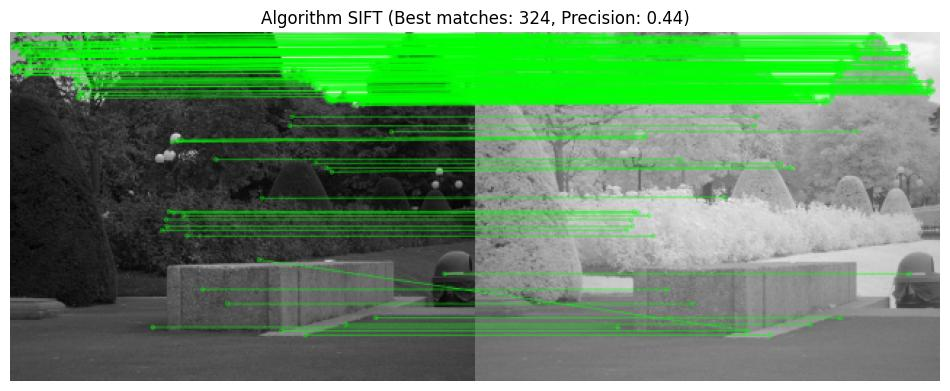

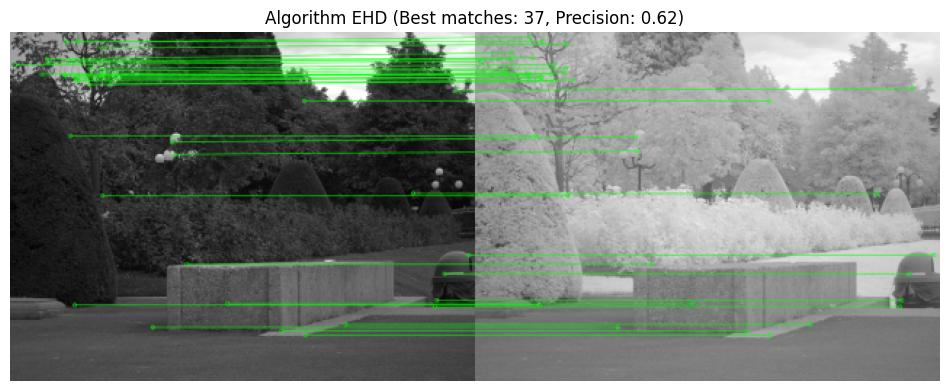

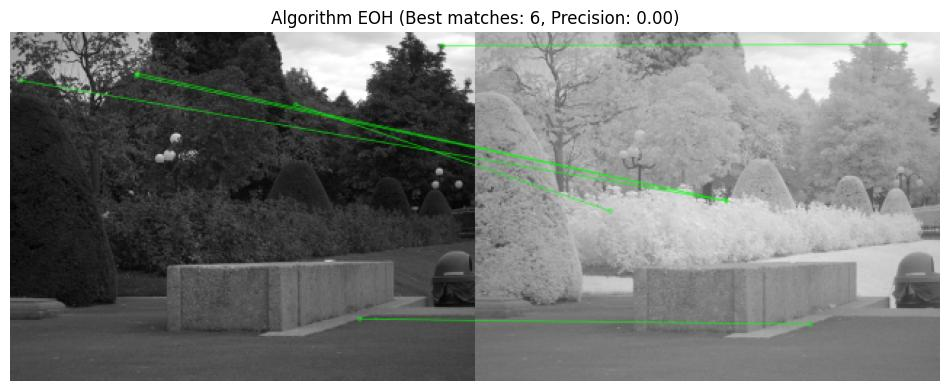

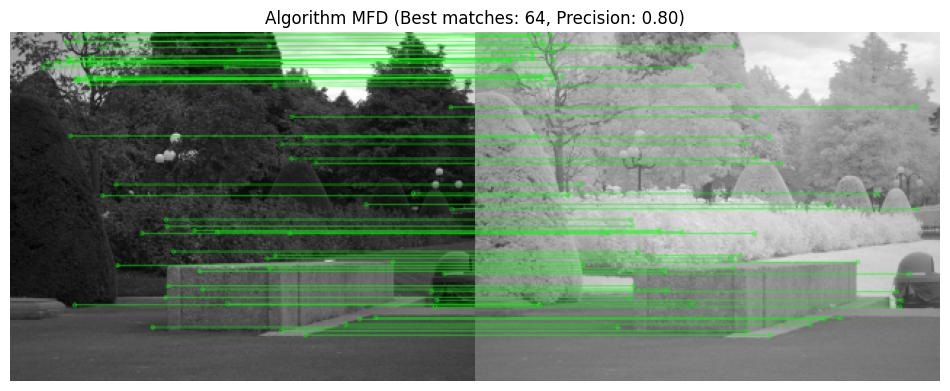

In [6]:
run_batch("images-sample/img1.png", "images-sample/img2.png")

In [18]:
result_precision.describe()

,SIFT,EHD,EOH,MFD
count,2.000000,2.000000,2.000000,2.000000
mean,0.574735,0.772349,0.268116,0.898438
std,0.197354,0.213161,0.379173,0.143631
min,0.435185,0.621622,0.000000,0.796875
25%,0.504960,0.696985,0.134058,0.847656
50%,0.574735,0.772349,0.268116,0.898438
75%,0.644511,0.847713,0.402174,0.949219
max,0.714286,0.923077,0.536232,1.000000


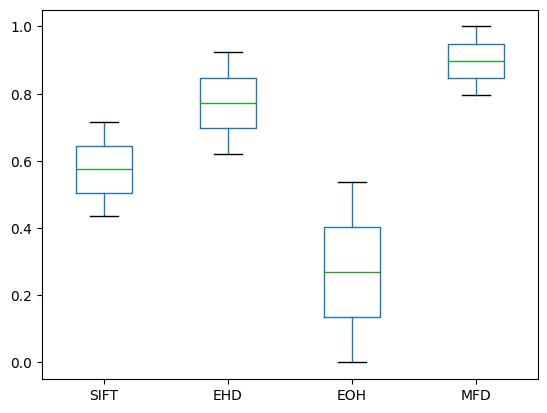

In [19]:
plot = result_precision.boxplot(grid=False)

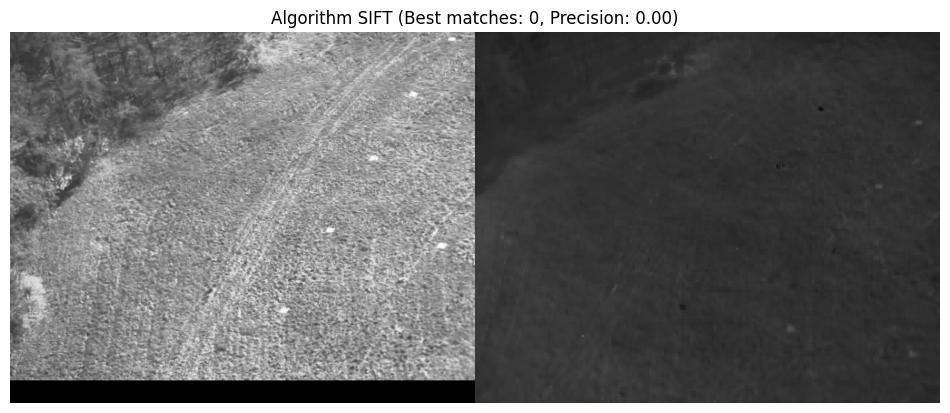

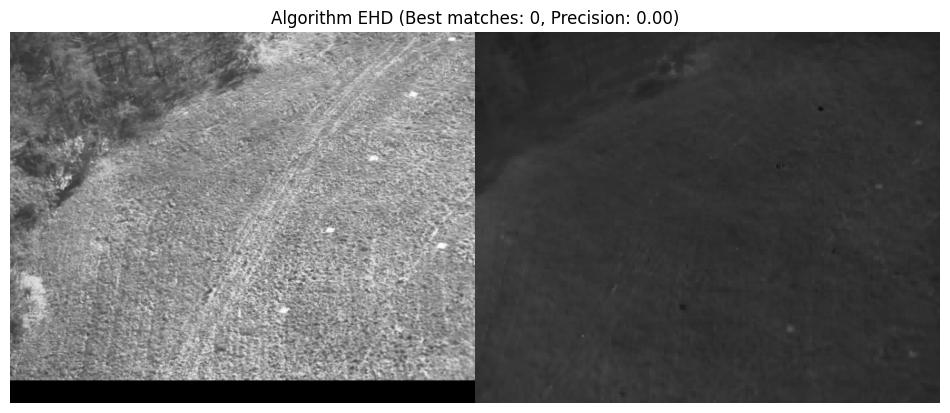

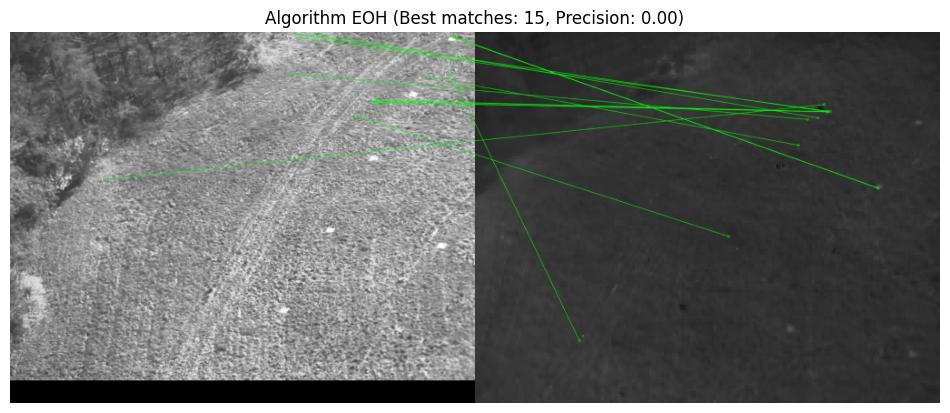

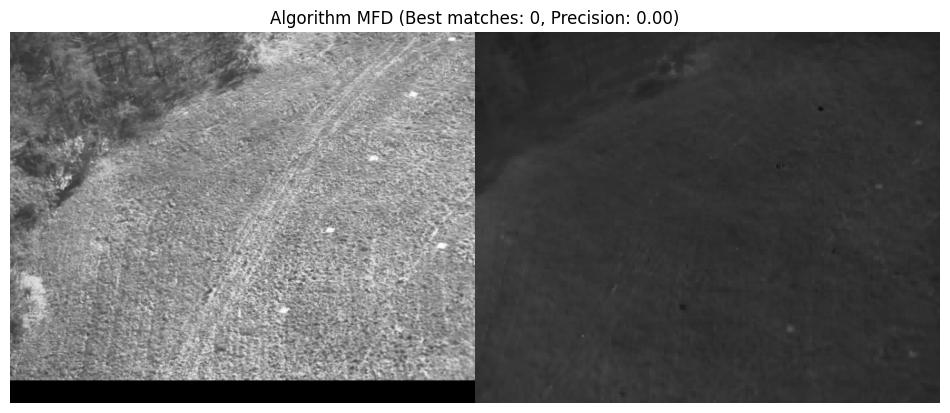

In [8]:
run_batch("/data/OT/NVESD/video/frames/VIS/1280/vis-0600.jpg", "/data/OT/NVESD/video/frames/LWIR/org/IR-0600.jpg")

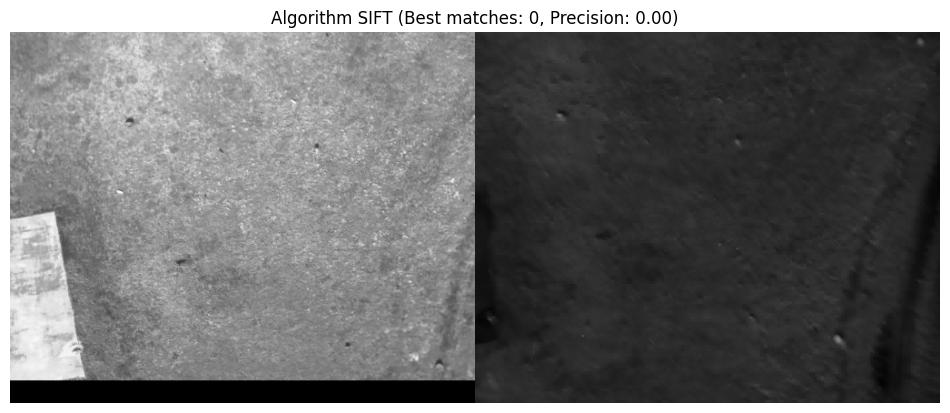

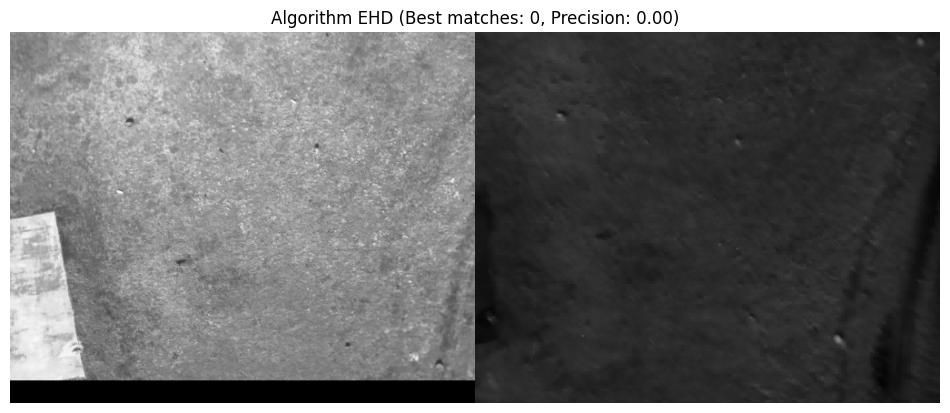

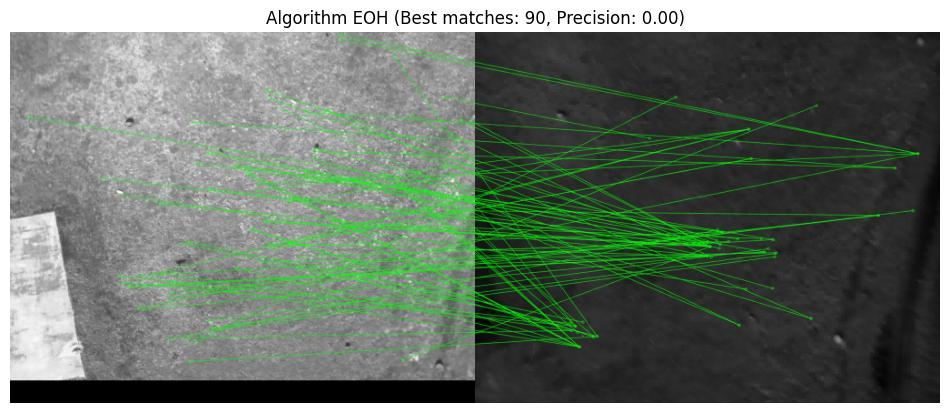

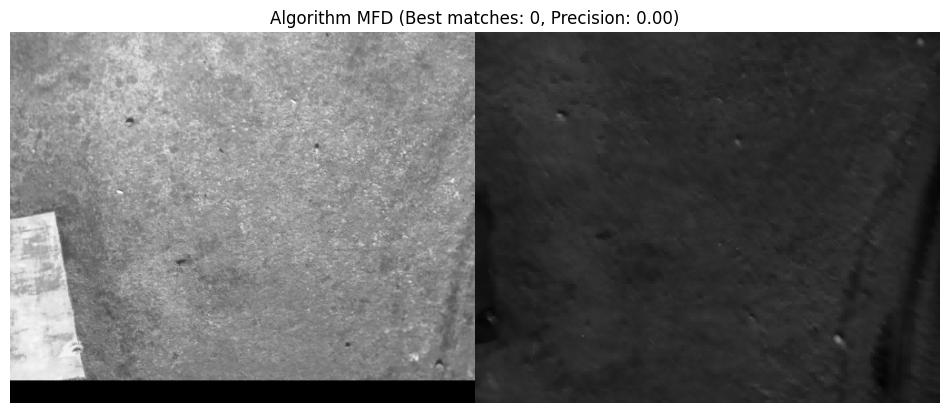

In [9]:
run_batch("/data/OT/NVESD/video/frames/VIS/1280/vis-0720.jpg", "/data/OT/NVESD/video/frames/LWIR/org/IR-0720.jpg")